In [3]:
import sys
sys.path.append('pyFiles')
from Multi2Agent import CustomEnvironment
import networkx as nx
import pprint
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

ModuleNotFoundError: No module named 'Multi2Agent'

## Q value

In [11]:
def q_val(env,state,action,s_values):
    env.reset()
    env.state = state
    reward = 0
    observations, rewards, terminations, truncations, infos = env.step(action)
    s_val_index = state_index_calculator(env,observations)
    for agent in env.possible_police:
        reward += rewards[agent]
    return reward + 0.8*s_values[s_val_index]

## State Value Function , Max Action Function , State Index Calculator, State Calculator


In [1]:
def s_val(env,state,s_values):
    for thief in env.possible_thieves:
        for police in env.possible_police:
            if state[thief] == state[police]:
                return 0
    q_values = []
    for j in range(4):
        for k in range(4):
            for l in range(4):
                temp_state = state.copy()
                action = {env.possible_agents[0]:1,env.possible_agents[1]:k,env.possible_agents[2]:l} 
                q_values.append(q_val(env,temp_state,action,s_values))
    return max(q_values)

def max_act(env,state,s_values):
#     action = {env.possible_agents[0]:0,env.possible_agents[1]:0,env.possible_agents[2]:0,env.possible_agents[3]:0}
#     for thief in env.possible_thieves:
#         for police in env.possible_police:
#             if state[thief] == state[police]:
#                 return action
    q_values = [] 
    actions = []
    temp_state = state.copy()
    for k in range(4):
        for l in range(4):
            temp_state = state.copy()
            action = {env.possible_agents[0]:1,env.possible_agents[1]:k,env.possible_agents[2]:l}
            q_values.append(q_val(env,temp_state,action,s_values))
            actions.append(action)
    max_val = max(q_values)
    max_val_index = q_values.index(max_val)
    env.state = state
    return actions[max_val_index]

def state_index_calculator(env,state):
    """ every possible state maps to an index. this function maps state to its index
    """
    multiplier = 1
    state_index = 0
    for agent in env.possible_agents:
        state_index += env.node_inv_dict[state[agent]]* multiplier
        multiplier *= env.g_no_node
    return state_index

def state_calculator(env,state_index):
    """ every possible state maps to an index. this function maps index to state
    """
    temp_state = {}
    no_of_agents = len(list(env.possible_agents))
    for n in range (no_of_agents):
        temp_state[env.possible_agents[n]] = env.node_dict[(state_index // (env.g_no_node**(3-n)))]
        state_index = state_index % (env.g_no_node**(3-n))
    return temp_state

In [2]:
env = CustomEnvironment()
print(state_index_calculator(env,5))

NameError: name 'CustomEnvironment' is not defined

## Single Sweep

In [4]:
def single_sweep(env,s_values):
    temp_value_func = [0] * env.g_no_node ** 3
    for i in range(env.g_no_node**3):
        state= state_calculator(env,i)
        temp_value_func[i] = s_val(env,state,s_values)
    return temp_value_func

## Until Convergence

In [15]:
env = CustomEnvironment() 
print(env.possible_agents)
print(env.g_no_node**3)
print(env)

print(env.node_dict)

print(env.node_inv_dict)

print(env.node_positions)

['thief_0', 'police_0', 'police_1']
6859
custom_graph_environment_v3
{0: '(0.19992177320742419, 0.3444515821822909)', 1: '(0.22821203424164746, 0.5029083802751683)', 2: '(0.20552139150292098, 0.554666334735012)', 3: '(0.4028840030738831, 0.9550652406422548)', 4: '(0.7862371954417654, 0.8190658169987436)', 5: '(0.44811437238452245, 0.9045289990489157)', 6: '(0.5798499221127168, 0.3591159380711344)', 7: '(0.6171489120032924, 0.23498045883754137)', 8: '(0.2831911754505866, 0.2787555382740357)', 9: '(0.3584447216903549, 0.09709933172300317)', 10: '(0.5806068458871527, 0.3606066009240778)', 11: '(0.48381788152811805, 0.5758181303479604)', 12: '(0.6912996529354414, 0.14621566078753526)', 13: '(0.7782905262525462, 0.7531008790263298)', 14: '(0.7723721012310661, 0.4507320389004014)', 15: '(0.5180104471702501, 0.6608648024811047)', 16: '(0.5034274596765445, 0.6055897626427533)', 17: '(0.7260100327131787, 0.6844412631187945)', 18: '(0.737753001636785, 0.5186042304827722)'}
{'(0.19992177320742419

In [6]:
state = env.reset()
s_values = [0] * env.g_no_node ** 3
delta = 14500
diff = 100000
count = 30
# while (diff > delta):
for i in range(count):
    state = env.reset()
    temp_value_func = [v for v in s_values]
    s_values = single_sweep(env,s_values)
    temp_diff = 0;
    for index in range(len(s_values)):
        temp_diff += abs(temp_value_func[index]-s_values[index])
    diff = temp_diff
    # plt.plot(range(env.g_no_node**3),s_values)
    # plt.show()

    print(temp_diff)
    
s_values2 = [0] * env.g_no_node ** 3


255865.0
119403.0
48061.39999999891
20543.239999999976
9848.959999999879
9673.647999999961
9732.979199999816
9495.817919999956
9300.660351999933
8594.653811200013
8631.104286719992
8919.966572031955
8573.01194321916
9298.984765931475
8946.14445955884
8532.606675735313
8781.068005441139
8987.960803264674
8889.77648195882
8932.601889175272
9135.858733505143
8968.540840103098
9389.132504061843
9585.767502437102
8985.164501462265
8706.322700877323
8618.353620526392
8957.456972315826
9562.78458338944
9391.120350033676


## Visualization of convergence

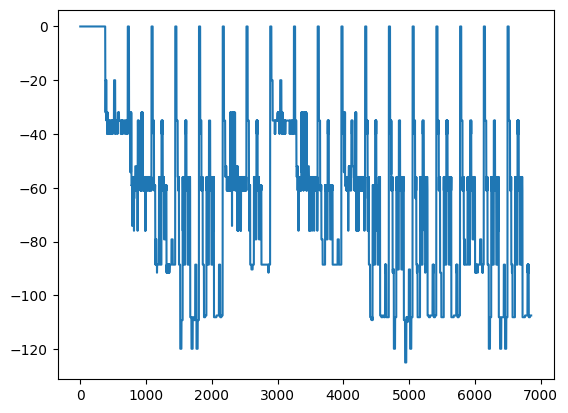

In [7]:
plt.plot(range(env.g_no_node**3),s_values)
plt.show()

<Axes: >

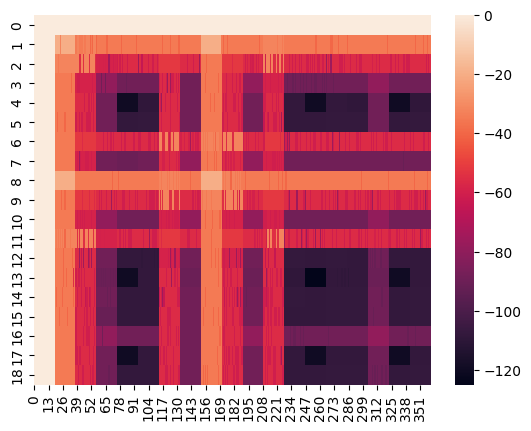

In [8]:
import seaborn as sns
import numpy as np
no_of_nodes = 19
x = np.zeros((no_of_nodes**1,no_of_nodes**2))

for n in range(len(s_values)):
    i = n // no_of_nodes**2
    j = n % no_of_nodes**2
    x[i,j] = s_values[n]

# sns.set(rc={'figure.figsize':(13,10)})
sns.heatmap(x)

## Implementataion of Policy

Run no 1

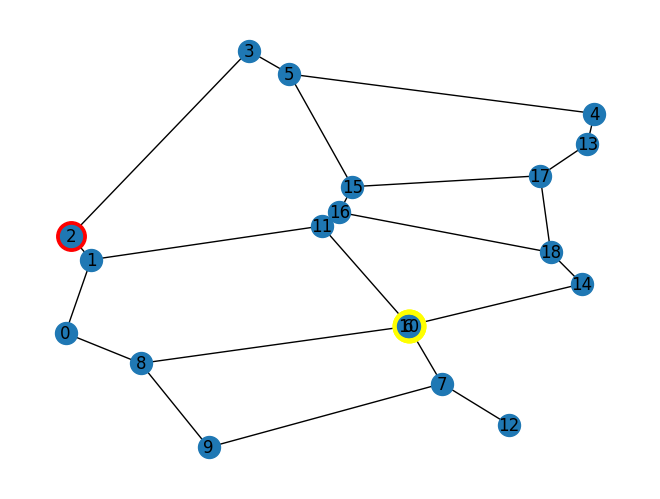

{'thief_0': '(0.4028840030738831, 0.9550652406422548)', 'police_0': '(0.48381788152811805, 0.5758181303479604)', 'police_1': '(0.48381788152811805, 0.5758181303479604)'}
{'thief_0': '(0.4028840030738831, 0.9550652406422548)', 'police_0': '(0.48381788152811805, 0.5758181303479604)', 'police_1': '(0.48381788152811805, 0.5758181303479604)'}


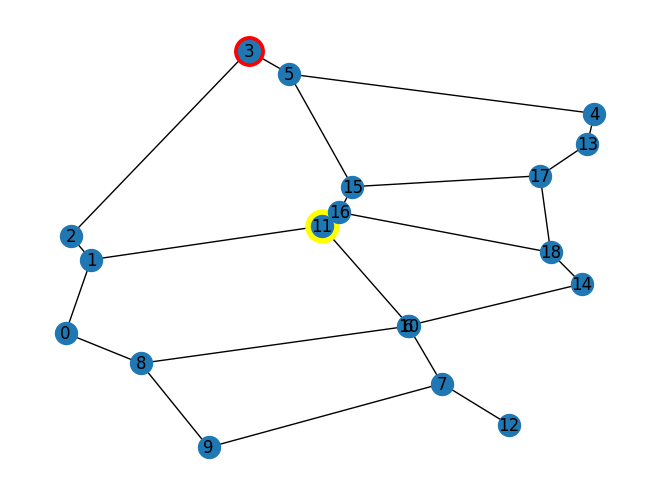

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.4028840030738831, 0.9550652406422548)', 'police_0': '(0.48381788152811805, 0.5758181303479604)', 'police_1': '(0.48381788152811805, 0.5758181303479604)'}
{'thief_0': '(0.4028840030738831, 0.9550652406422548)', 'police_0': '(0.48381788152811805, 0.5758181303479604)', 'police_1': '(0.48381788152811805, 0.5758181303479604)'}


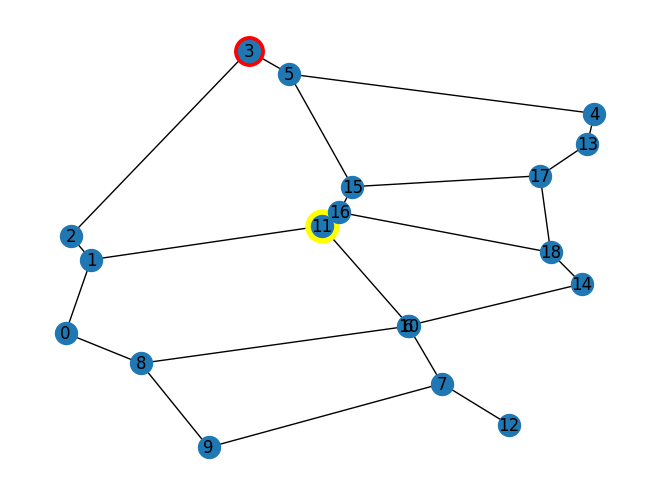

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.20552139150292098, 0.554666334735012)', 'police_0': '(0.22821203424164746, 0.5029083802751683)', 'police_1': '(0.22821203424164746, 0.5029083802751683)'}
{'thief_0': '(0.20552139150292098, 0.554666334735012)', 'police_0': '(0.22821203424164746, 0.5029083802751683)', 'police_1': '(0.22821203424164746, 0.5029083802751683)'}


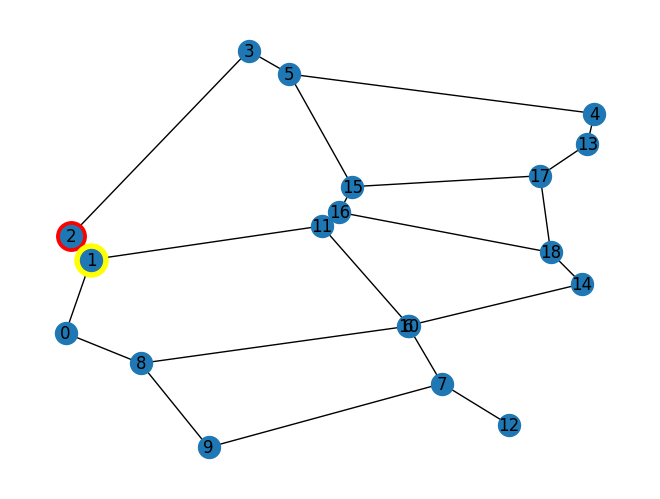

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.20552139150292098, 0.554666334735012)', 'police_0': '(0.20552139150292098, 0.554666334735012)', 'police_1': '(0.20552139150292098, 0.554666334735012)'}
{'thief_0': '(0.20552139150292098, 0.554666334735012)', 'police_0': '(0.20552139150292098, 0.554666334735012)', 'police_1': '(0.20552139150292098, 0.554666334735012)'}


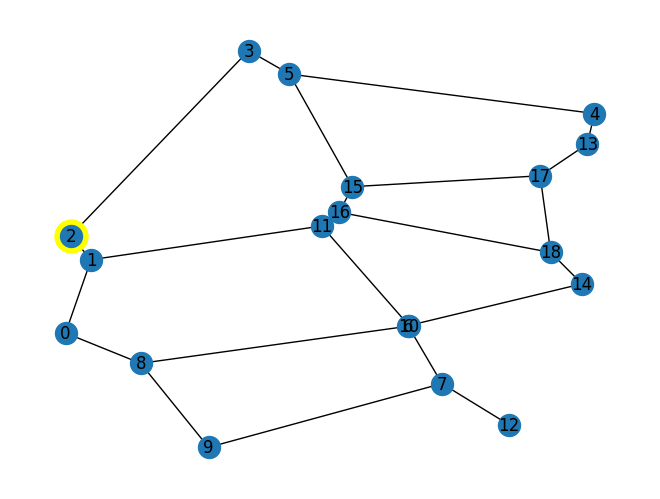

{'thief_0': True, 'police_0': False, 'police_1': False}
terminating episode = 3
Episode: 1 Score: {'thief_0': 30, 'police_0': -95, 'police_1': -95} 



In [9]:

episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = {agent:False for agent in env.possible_agents}
    score = {a:0 for a in env.possible_agents}
    count = 0
    env.temp_render(episode)
    terminated = False
    while not terminated:
        action = max_act(env,state,s_values)
        observations, rewards, terminations, truncations, infos = env.step(action)
        state = env.state
        print(observations)
        print(env.state)
        env.temp_render(episode)
        print(terminations)
        if (terminations['thief_0'] == True):
            print('terminating episode = {}'.format(count))
            terminated = True
        for agent in env.agents:
            score[agent] += rewards[agent]
        count += 1
    print('Episode: {} Score: {} \n'.format(episode,score))

Run no 2

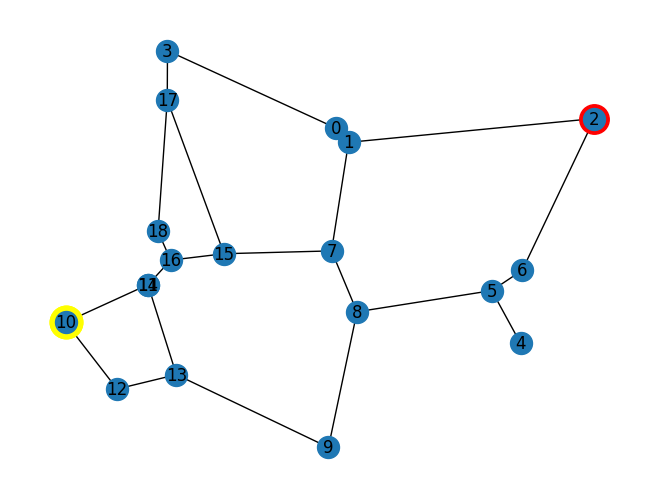

{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.18534535116246542, 0.35829316577499914)', 'police_1': '(0.18534535116246542, 0.35829316577499914)'}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.18534535116246542, 0.35829316577499914)', 'police_1': '(0.18534535116246542, 0.35829316577499914)'}


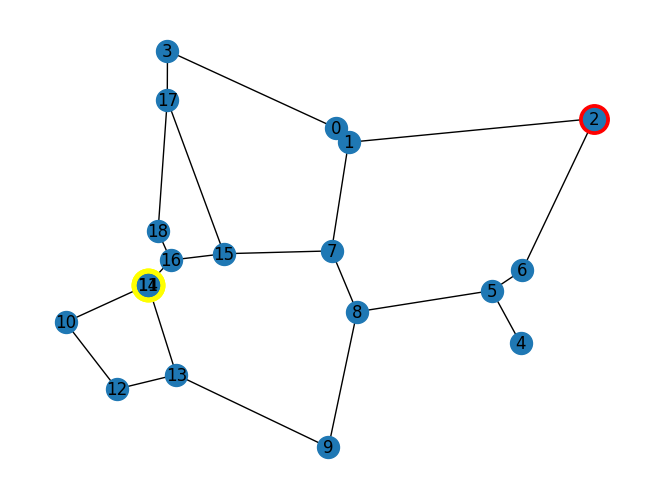

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.18603234278774222, 0.3583004912070694)', 'police_1': '(0.18603234278774222, 0.3583004912070694)'}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.18603234278774222, 0.3583004912070694)', 'police_1': '(0.18603234278774222, 0.3583004912070694)'}


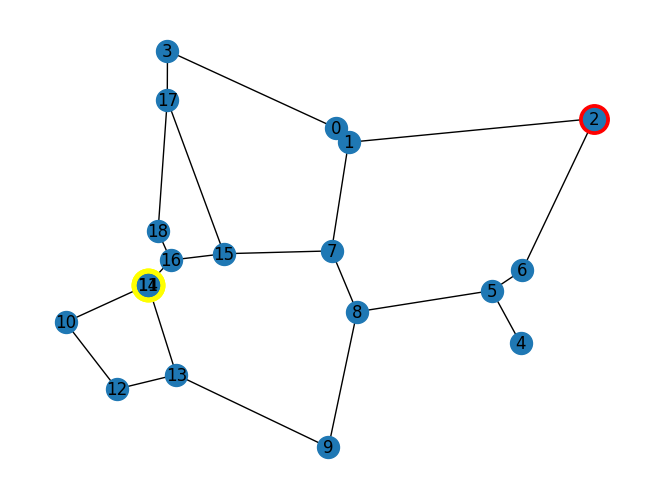

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.22719293694892034, 0.4086489882761455)', 'police_1': '(0.23752780572773582, 0.17508099178756828)'}
{'thief_0': '(0.9956001267050132, 0.697537144108571)', 'police_0': '(0.22719293694892034, 0.4086489882761455)', 'police_1': '(0.23752780572773582, 0.17508099178756828)'}


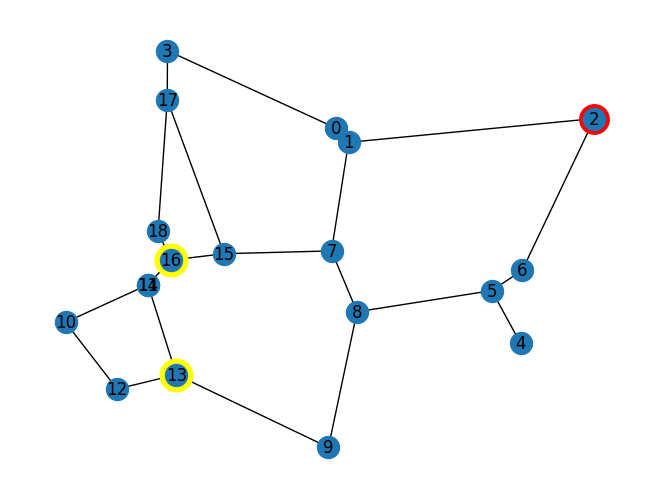

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.5132506001046624, 0.02674563925634386)'}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.5132506001046624, 0.02674563925634386)'}


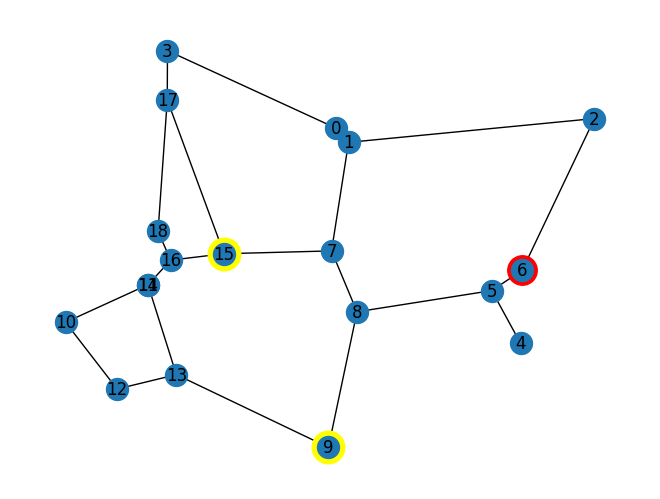

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}
{'thief_0': '(0.8646810135375538, 0.38803400659007303)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}


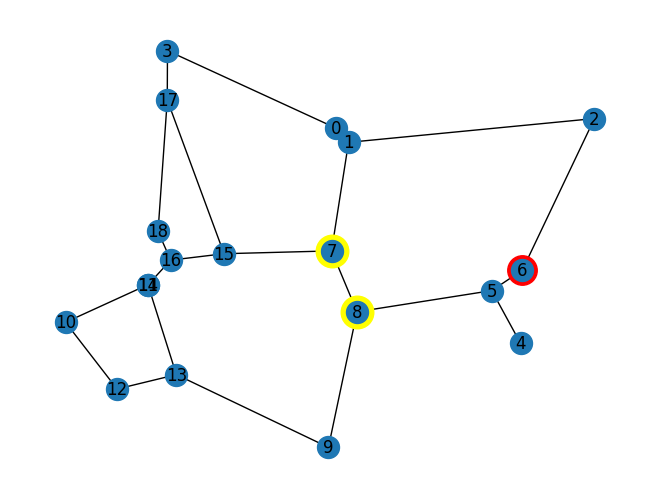

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.8094125332714186, 0.3465499248356554)'}
{'thief_0': '(0.8094125332714186, 0.3465499248356554)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.8094125332714186, 0.3465499248356554)'}


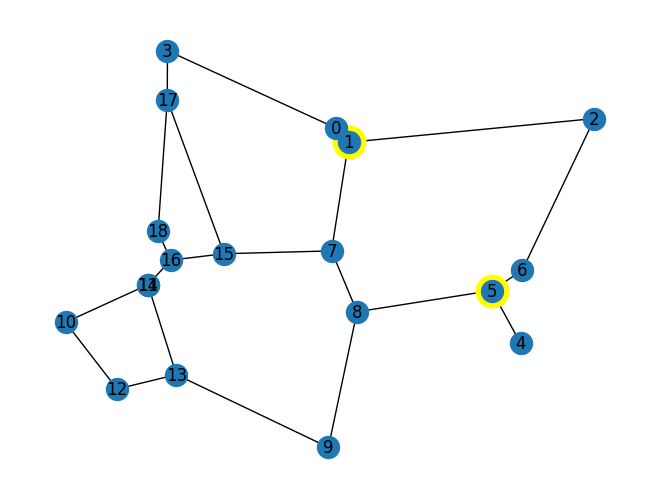

{'thief_0': True, 'police_0': False, 'police_1': False}
terminating episode = 5
Episode: 1 Score: {'thief_0': -45, 'police_0': -30, 'police_1': 75} 



In [30]:

episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = {agent:False for agent in env.possible_agents}
    score = {a:0 for a in env.possible_agents}
    count = 0
    env.temp_render(episode)
    terminated = False
    while not terminated:
        action = max_act(env,state,s_values)
        observations, rewards, terminations, truncations, infos = env.step(action)
        state = env.state
        print(observations)
        print(env.state)
        env.temp_render(episode)
        print(terminations)
        if (terminations['thief_0'] == True):
            print('terminating episode = {}'.format(count))
            terminated = True
        for agent in env.agents:
            score[agent] += rewards[agent]
        count += 1
    print('Episode: {} Score: {} \n'.format(episode,score))

Run no 3

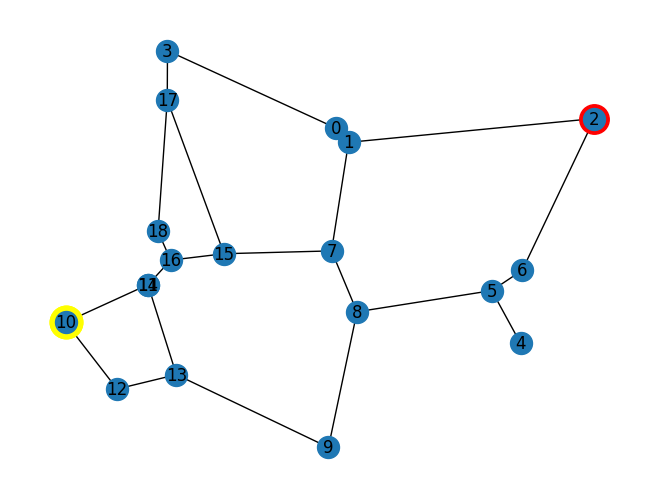

{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.18534535116246542, 0.35829316577499914)', 'police_1': '(0.18534535116246542, 0.35829316577499914)'}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.18534535116246542, 0.35829316577499914)', 'police_1': '(0.18534535116246542, 0.35829316577499914)'}


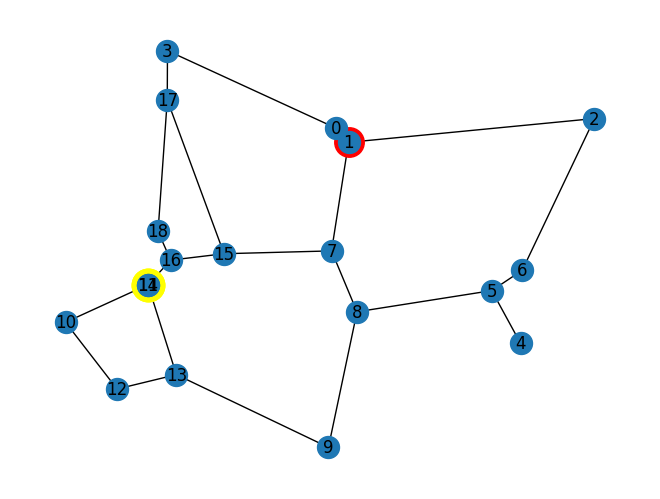

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.18603234278774222, 0.3583004912070694)', 'police_1': '(0.18603234278774222, 0.3583004912070694)'}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.18603234278774222, 0.3583004912070694)', 'police_1': '(0.18603234278774222, 0.3583004912070694)'}


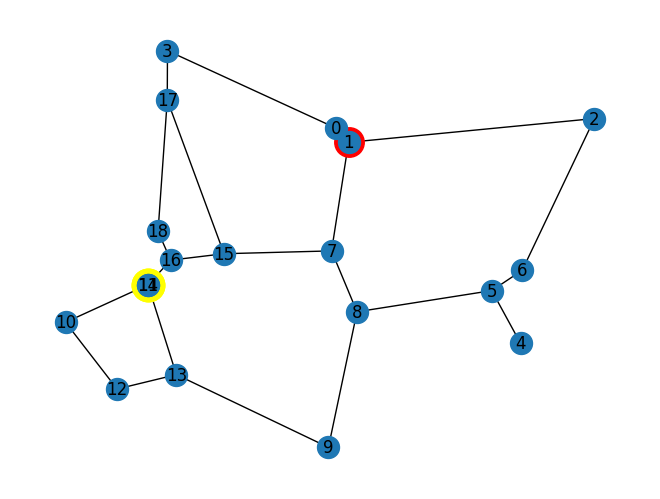

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5188809844123248, 0.4275302128012416)', 'police_0': '(0.22719293694892034, 0.4086489882761455)', 'police_1': '(0.23752780572773582, 0.17508099178756828)'}
{'thief_0': '(0.5188809844123248, 0.4275302128012416)', 'police_0': '(0.22719293694892034, 0.4086489882761455)', 'police_1': '(0.23752780572773582, 0.17508099178756828)'}


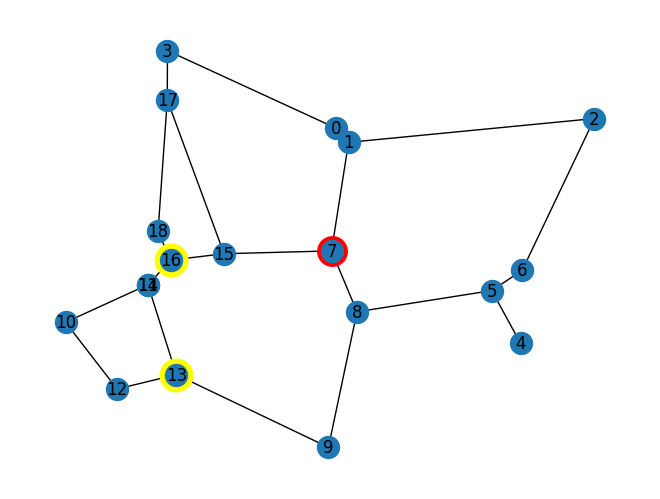

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.5132506001046624, 0.02674563925634386)'}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.3239998996475134, 0.421748832198577)', 'police_1': '(0.5132506001046624, 0.02674563925634386)'}


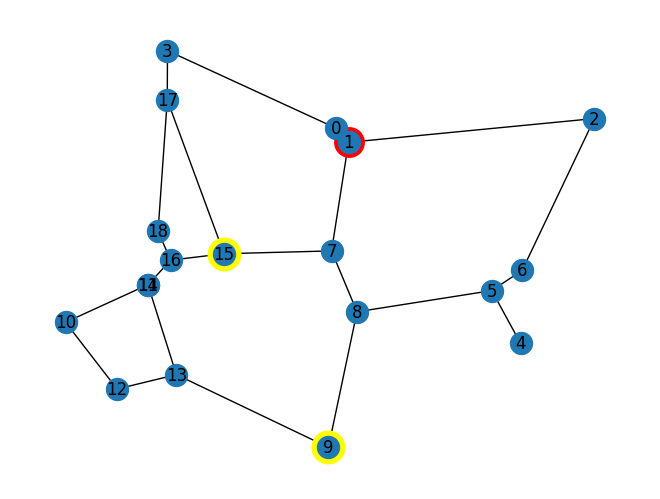

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.5188809844123248, 0.4275302128012416)', 'police_1': '(0.565075255173567, 0.3032727813989422)'}


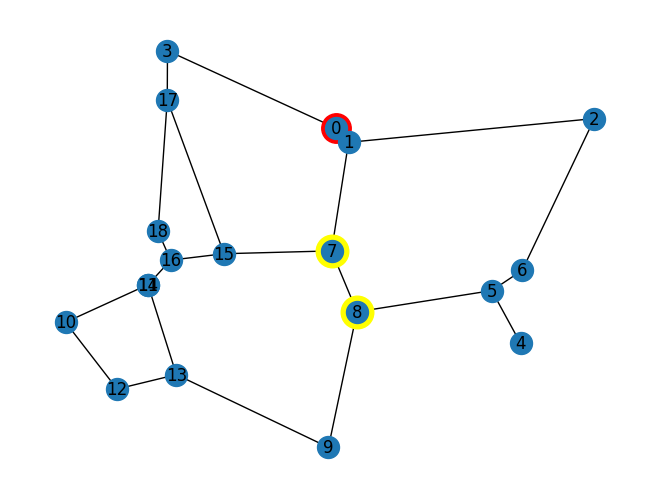

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.5188809844123248, 0.4275302128012416)'}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.5188809844123248, 0.4275302128012416)'}


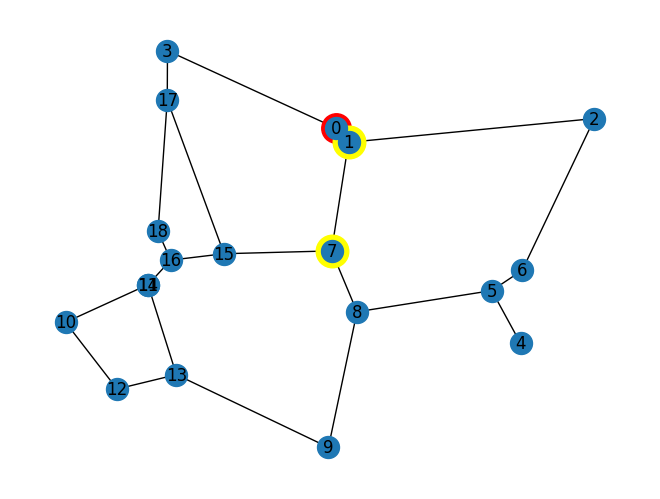

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.9956001267050132, 0.697537144108571)', 'police_1': '(0.5497170519864252, 0.6489559391432813)'}
{'thief_0': '(0.5270280200445087, 0.6779268981349057)', 'police_0': '(0.9956001267050132, 0.697537144108571)', 'police_1': '(0.5497170519864252, 0.6489559391432813)'}


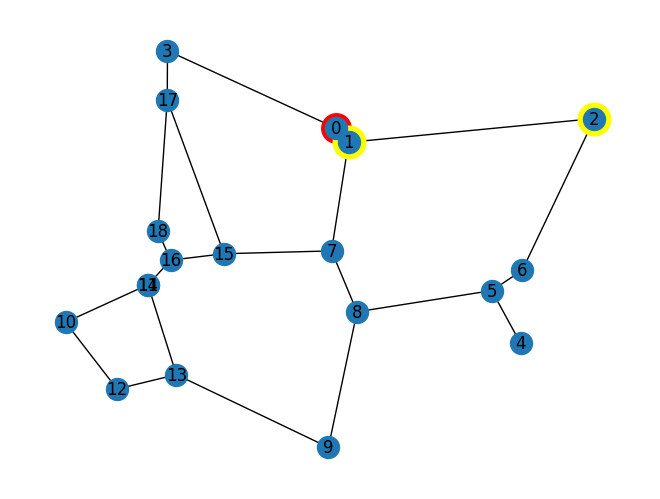

{'thief_0': False, 'police_0': False, 'police_1': False}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.5497170519864252, 0.6489559391432813)'}
{'thief_0': '(0.5497170519864252, 0.6489559391432813)', 'police_0': '(0.5497170519864252, 0.6489559391432813)', 'police_1': '(0.5497170519864252, 0.6489559391432813)'}


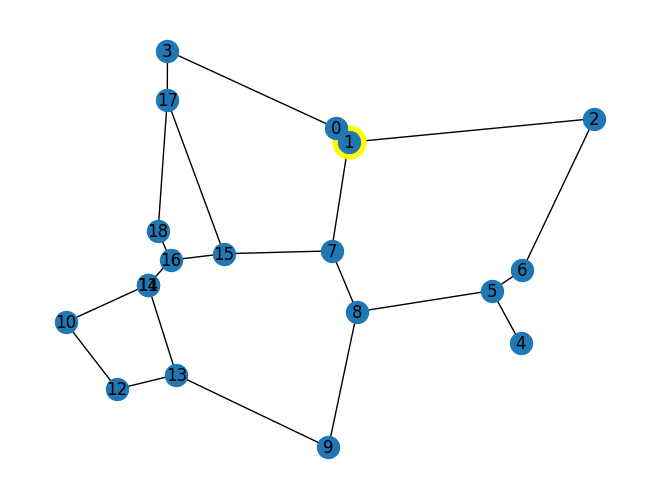

{'thief_0': True, 'police_0': False, 'police_1': False}
terminating episode = 7
Episode: 1 Score: {'thief_0': -50, 'police_0': 65, 'police_1': 65} 



In [31]:

episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = {agent:False for agent in env.possible_agents}
    score = {a:0 for a in env.possible_agents}
    count = 0
    env.temp_render(episode)
    terminated = False
    while not terminated:
        action = max_act(env,state,s_values)
        observations, rewards, terminations, truncations, infos = env.step(action)
        state = env.state
        print(observations)
        print(env.state)
        env.temp_render(episode)
        print(terminations)
        if (terminations['thief_0'] == True):
            print('terminating episode = {}'.format(count))
            terminated = True
        for agent in env.agents:
            score[agent] += rewards[agent]
        count += 1
    print('Episode: {} Score: {} \n'.format(episode,score))